In [1]:
from regain.datasets.hmm import generate_hmm
from regain.hmm.hmm_graphical_lasso_all import HMM_GraphicalLasso 
import numpy as np
from importlib import reload
import regain.hmm.utils; reload(regain.hmm.utils)
from regain.hmm.utils import results_recap
from regain.hmm.utils import cross_validation, cross_validation_auto
import pickle as pkl
import matplotlib.pyplot as plt

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# list of parameters to generate different kind of datasets

states = [5]
dims = [15]
mode_prec = ['regain']#'regain',
mode_mea = ['Normal']


alpha_list = np.logspace(-1, 1, 10)
clusters_list = np.arange(2,10)

[1037.41903148 1027.96351405 1046.45567521 1091.64881813 1080.30584454
 1063.45532997 1057.20585417 1003.43203508 1060.16453256 1006.74389189
 1004.10351139 1099.77703943 1097.15469235 1090.20418285 1064.61303717]


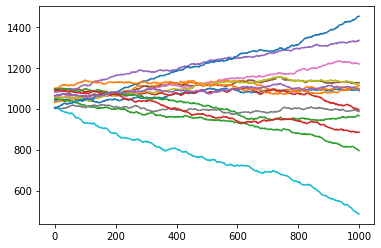

In [3]:
# Generate a dataset

dataset = generate_hmm(n_samples=1000, n_states=states[0], n_dim_obs=dims[0],
                       mode_precisions=mode_prec[0],mode_mean = mode_mea[0], transition_type='fixed',sigma = 0.4)

p_vec_0 = np.random.uniform(0,100,dims)+1000
Data = np.zeros((np.size(dataset['data'],axis=0),dims[0]))
print(p_vec_0)
for j in range(dims[0]):
    #print(p_vec_0[j])
    #print(np.cumsum(dataset['data'][:,j]))
    plt.plot(p_vec_0[j]+np.cumsum(dataset['data'][:,j]))
    Data[:,j] = p_vec_0[j]+np.cumsum(dataset['data'][:,j])
    
plt.show()

645 -3.7665725161401773
737 -3.751901033569025
47 -3.757250661340313
272 -3.699309152708186
867 -3.316751546835772
975 -3.4225725595121332
229 -4.648195093593012
137 -3.158005967289061
744 -4.232083539228377
975 -4.320131354437153
1 -3.252747018727203
140 -3.4492720288184007
340 -3.9950493571444445
226 -4.728136459295288
347 -3.5859013894447935


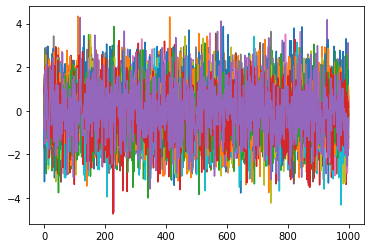

In [4]:
PercVar_mat = np.zeros((np.size(dataset['data'],axis=0)-1,dims[0]))
for j in range(dims[0]):
    temp = Data[:,j]
    PercVar = []
    for t in range(np.size(dataset['data'],axis=0)-1):
        PercVar.append((temp[t+1]-temp[t])/temp[t]*100)
        PercVar_mat[t,j]= (temp[t+1]-temp[t])/temp[t]*100

                   
    print(np.argmin(dataset['data'][:,j]),min(dataset['data'][:,j]))
    plt.plot(dataset['data'][:,j])              
                   
plt.show()                   
                   

In [5]:
# HMM_GraphicalLasso with a given alpha 
mdl = HMM_GraphicalLasso(alpha=2, n_clusters=5, verbose=False, mode='scaled',mode_lam ='fixed',
                         warm_restart=True, repetitions=3,n_jobs=-1)

#CV

res = (cross_validation(mdl, dataset['data'], params={'alpha':alpha_list,
                               'n_clusters':clusters_list},
 mode='stability', n_repetitions=3))

# HMM_GraphicalLasso with auto generated alpha 

mdl = HMM_GraphicalLasso(alpha=2, n_clusters=5, verbose=False, mode='scaled',mode_lam ='auto',
                         warm_restart=True, repetitions=3,n_jobs=-1)

#CV
res_1 = (cross_validation_auto(mdl, dataset['data'],
            params={'n_clusters':clusters_list},mode='stability', n_repetitions=3))



 25%|██▌       | 2/8 [03:23<09:08, 91.48s/it]

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6)}

In [ ]:
# list of parameters to generate different kind of datasets

states =np.arange(2,10)
dims = np.arange(5,35,5)
mode_prec = [ 'complementary']#'regain',
mode_mea = ['Normal', 'Uniform']


alpha_list = np.logspace(-1, 1, 10)
clusters_list = np.arange(2,20)

In [ ]:
for st in states:
    for dim in dims:
        for mp in mode_prec:
            for mm in mode_mea:
                
                # Generate a dataset
                dataset = generate_hmm(n_samples=1000, n_states=st, n_dim_obs=dim,
                       mode_precisions=mp,mode_mean = mm, transition_type='fixed')
                
                print('Case: N_states:',st,',TS dim:',dim,',Prec mode:',mp,',Mean mode:',mm)
                
                # HMM_GraphicalLasso with a given alpha 
                mdl = HMM_GraphicalLasso(alpha=2, n_clusters=5, verbose=False, mode='scaled',mode_lam ='fixed',
                                         warm_restart=True, repetitions=10,n_jobs=-1)
                
                #CV
                res = ((st,dim,mp,mm),cross_validation(mdl, dataset['data'], params={'alpha':alpha_list,
                                               'n_clusters':clusters_list},
                 mode='stability', n_repetitions=10))
                
                # HMM_GraphicalLasso with auto generated alpha 
                
                mdl = HMM_GraphicalLasso(alpha=2, n_clusters=5, verbose=False, mode='scaled',mode_lam ='auto',
                                         warm_restart=True, repetitions=10,n_jobs=-1)
                
                #CV
                res_1 = ((st,dim,mp,mm),cross_validation_auto(mdl, dataset['data'],
                            params={'n_clusters':clusters_list},mode='stability', n_repetitions=10))
                
                with open('results_'+st+'states_'+dim+'dimensions_'+mp+'precisiontype_'+mm+'meantype.pkl', wb) as f:
                    pkl.dump([res, res_1], f)